In [1]:
# Import
import pandas as pd
from lxml import html
from bs4 import BeautifulSoup as bs
from IPython.display import clear_output
import numpy as np

In [2]:
# Variables
file_name = "FFS MLB Sheet.xlsx"

#### OPTIONAL FOR TEAM SPECIFIC REPORTS ####
#ffs_teams_list = ['CIN', 'BAL']
ffs_teams_list = ['ARI','ATL','BAL','BOS','CHC','CHW','CIN','CLE','COL','DET','HOU','KC','LAA','LAD','MIA','MIL','MIN','NYM','NYY','OAK','PHI','PIT','SD','SEA','SF','STL','TB','TEX','TOR','WAS']


In [3]:
# Import Jimmy Johnson's pick valuation sheet
pick_valuation_chart = pd.read_csv('draft/jj_pick_valuation.csv')
pick_valuation_chart


,pick_number,pick_value
0,1,3000.00
1,2,2600.00
2,3,2200.00
3,4,1800.00
4,5,1700.00
...,...,...
251,252,0.60
252,253,0.55
253,254,0.50
254,255,0.45


In [4]:
# Pick number function

def get_pick_info(pick, current_year):
    
    cy2 = f'{current_year[-2]}{current_year[-1]}'
    if cy2 in pick:
    
        # SS error handling
        #if 'CHW' in pick:
        #    pick_name_array = pick.split(' ')
        #    pick = f'{pick_name_array[0]} CWS {pick_name_array[2]}'
    
        # Draft Order
        draft_order = ({
            "teams": ffs_teams_list,
            "pick_number": [22,27,24,10,23,1,4,5,30,17,21,29,25,14,12,11,20,19,13,9,2,7,26,8,15,16,28,18,6,3]
        })
    
        # Rounds
        pick_num = 0
        
        if '1ST' in pick:
            pick_round = '1'
        if '1A' in pick:
            pick_num += 30
            pick_round = '1A'
        if '2ND' in pick:
            pick_num += 36
            pick_round = '2'
        if '3RD' in pick:
            pick_num += 66
            pick_round = '3'
        if '3A' in pick:
            pick_num += 96
            pick_round = '3A'
        if '4TH' in pick:
            pick_num += 102
            pick_round = '4'
        if '5TH' in pick:
            pick_num += 132
            pick_round = '5'
        if '6TH' in pick:
            pick_num += 162
            pick_round = '6'
        if '7TH' in pick or '8TH' in pick or '9TH' in pick or '10TH' in pick or '11TH' in pick:
            return
    
        # Sandwich Picks
        if 'P1' in pick:
            pick_num += 1
            round_pick = '1'
        if 'P2' in pick:
            pick_num += 2
            round_pick = '2'
        if 'P3' in pick:
            pick_num += 3
            round_pick = '3'
        if 'P4' in pick:
            pick_num += 4
            round_pick = '4'
        if 'P5' in pick:
            pick_num += 5
            round_pick = '5'
        if 'P6' in pick:
            pick_num += 6
            round_pick = '6'
        
        # Get draft order pick number
        pick_count = 0
        for team in draft_order['teams']:
            
            # Get pick of the round
            if team in pick:
                pick_num += draft_order['pick_number'][pick_count]
                round_pick = draft_order['pick_number'][pick_count]
            pick_count += 1
            
            
            
            # Jimmy Johnsons's pick valuation
            value_count = 0
            for jj_pick_number in pick_valuation_chart['pick_number']:
                if jj_pick_number == pick_num:
                    pick_val = pick_valuation_chart['pick_value'][value_count]
                value_count += 1
            
            
        # Get pick value
        
        
        
        
        return pick_num, pick_val, pick_round, round_pick

In [5]:
# Import FFS MLB Sheet
# Read Player Names
cols = ['S','U','W']
current_year = "2022"
year_minus1 = str(int(current_year) - 1)
year_plus1 = str(int(current_year) + 1)
year_plus2 = str(int(current_year) + 2)

draft_sheet = []

# Loop through each tab to pull list of player names
for team in ffs_teams_list:
    
    # Write progress to console
    print(f"Processing data for {team}") 
        
    for col in cols:
        # Variables
        sheet = pd.read_excel(file_name, sheet_name=team, usecols=col, skiprows=1, index_col=None, header=0)
        # Remove empty rows
        nan_value = float("NaN")
        sheet.replace("", nan_value, inplace=True)
        sheet.dropna(inplace=True)
    
        picks = sheet.values
        for pick in picks:
            try:
                pick_num, pick_val, pick_round, round_pick = get_pick_info(pick[0], current_year)
            except:
                pick_num, pick_val = (None,None)
            if pick_num != None:
                team_dict = {
                    "round_and_pick": f'R{pick_round}P{round_pick}',
                    "pick": pick[0],
                    "team": team,
                    "pick_num": pick_num,
                    "pick_value": pick_val,
                    
                }
                draft_sheet.append(team_dict)

    #print(pick_list)
        
    # Clear console output
    #clear_output(wait=True)
    

Processing data for ARI
Processing data for ATL
Processing data for BAL
Processing data for BOS
Processing data for CHC
Processing data for CHW
Processing data for CIN
Processing data for CLE
Processing data for COL
Processing data for DET
Processing data for HOU
Processing data for KC
Processing data for LAA
Processing data for LAD
Processing data for MIA
Processing data for MIL
Processing data for MIN
Processing data for NYM
Processing data for NYY
Processing data for OAK
Processing data for PHI
Processing data for PIT
Processing data for SD
Processing data for SEA
Processing data for SF
Processing data for STL
Processing data for TB
Processing data for TEX
Processing data for TOR
Processing data for WAS


In [6]:
# Show results
draft_sheet_df = pd.DataFrame(draft_sheet)
draft_sheet_df = draft_sheet_df.sort_values(by=['pick_num'])
draft_sheet_df

,round_and_pick,pick,team,pick_num,pick_value
30,R1P1,1ST CHW 22,CHW,1,3000.0
177,R1P2,1ST PHI 22,WAS,2,2600.0
104,R1P3,1ST WAS 22,NYM,3,2200.0
45,R1P4,1ST CIN 22,CIN,4,1800.0
54,R1P5,1ST CLE 22,CLE,5,1700.0
...,...,...,...,...,...
161,R6P26,6TH SD 22,TEX,188,17.2
176,R6P27,6TH ATL 22,WAS,189,16.8
178,R6P28,6TH TB 22,WAS,190,16.4
69,R6P29,6TH KC 22,DET,191,16.0


In [7]:
# Export csv
draft_sheet_df.set_index(['pick_num'], inplace = True) 
draft_sheet_df.to_csv(f"draft/draft_order.csv", index = False)

In [8]:
# Export HTML for Proboards
html = draft_sheet_df.to_html()
html = html.replace('<', '[').replace('>', ']').replace('[td', '[td style="border:1px solid rgb(0, 0, 0);padding:3px;"').replace('[table border="1" class="dataframe"]', '[table]').replace('pick_num', '').replace('team', 'Owner').replace('pick', 'Pick').replace('_value', ' Value').replace('round_and_Pick', '').replace('[tr style="text-align: right;"]', '[tr style="text-align: center;"]')
print(html)

[table]
  [thead]
    [tr style="text-align: center;"]
      [th][/th]
      [th][/th]
      [th]Pick[/th]
      [th]Owner[/th]
      [th]Pick Value[/th]
    [/tr]
    [tr]
      [th][/th]
      [th][/th]
      [th][/th]
      [th][/th]
      [th][/th]
    [/tr]
  [/thead]
  [tbody]
    [tr]
      [th]1[/th]
      [td style="border:1px solid rgb(0, 0, 0);padding:3px;"]R1P1[/td]
      [td style="border:1px solid rgb(0, 0, 0);padding:3px;"]1ST CHW 22[/td]
      [td style="border:1px solid rgb(0, 0, 0);padding:3px;"]CHW[/td]
      [td style="border:1px solid rgb(0, 0, 0);padding:3px;"]3000.0[/td]
    [/tr]
    [tr]
      [th]2[/th]
      [td style="border:1px solid rgb(0, 0, 0);padding:3px;"]R1P2[/td]
      [td style="border:1px solid rgb(0, 0, 0);padding:3px;"]1ST PHI 22[/td]
      [td style="border:1px solid rgb(0, 0, 0);padding:3px;"]WAS[/td]
      [td style="border:1px solid rgb(0, 0, 0);padding:3px;"]2600.0[/td]
    [/tr]
    [tr]
      [th]3[/th]
      [td style="border:1px solid rg

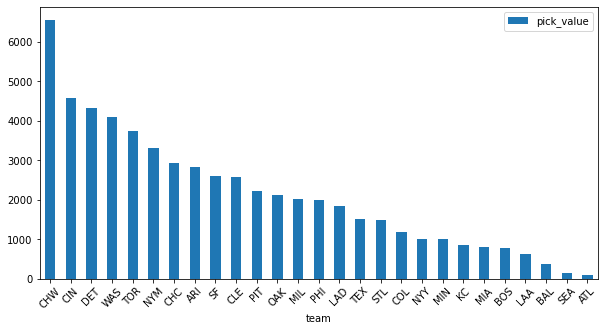

In [9]:
# Draft clout score (per team)
clout_df = draft_sheet_df.groupby(['team']).sum().sort_values(by=['pick_value'], ascending=False)
#clout_df
clout_df.plot.bar(rot=45, figsize=(10,5))


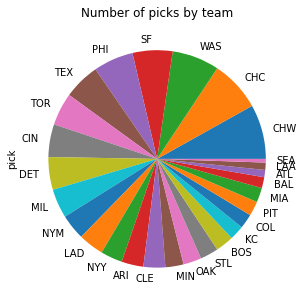

In [10]:
# Pie chart, number of picks
picks_by_team = draft_sheet_df.groupby(['team']).count().sort_values(by=['pick'], ascending=False)
picks_by_team
picks_by_team.plot.pie(y='pick', figsize=(10, 5), legend=False, title="Number of picks by team")

In [11]:
# Export HTML for Proboards
html = clout_df.to_html()
html = html.replace('<', '[').replace('>', ']').replace('[td', '[td style="border:1px solid rgb(0, 0, 0);padding:3px;"').replace('[table border="1" class="dataframe"]', '[table]').replace('pick_num', '').replace('team', 'Owner').replace('pick', 'Pick').replace('_value', ' Value').replace('round_and_Pick', '').replace('[tr style="text-align: right;"]', '[tr style="text-align: center;"]')
print(html)

[table]
  [thead]
    [tr style="text-align: center;"]
      [th][/th]
      [th]Pick Value[/th]
    [/tr]
    [tr]
      [th]Owner[/th]
      [th][/th]
    [/tr]
  [/thead]
  [tbody]
    [tr]
      [th]CHW[/th]
      [td style="border:1px solid rgb(0, 0, 0);padding:3px;"]6563.5[/td]
    [/tr]
    [tr]
      [th]CIN[/th]
      [td style="border:1px solid rgb(0, 0, 0);padding:3px;"]4581.0[/td]
    [/tr]
    [tr]
      [th]DET[/th]
      [td style="border:1px solid rgb(0, 0, 0);padding:3px;"]4327.6[/td]
    [/tr]
    [tr]
      [th]WAS[/th]
      [td style="border:1px solid rgb(0, 0, 0);padding:3px;"]4091.4[/td]
    [/tr]
    [tr]
      [th]TOR[/th]
      [td style="border:1px solid rgb(0, 0, 0);padding:3px;"]3736.2[/td]
    [/tr]
    [tr]
      [th]NYM[/th]
      [td style="border:1px solid rgb(0, 0, 0);padding:3px;"]3306.0[/td]
    [/tr]
    [tr]
      [th]CHC[/th]
      [td style="border:1px solid rgb(0, 0, 0);padding:3px;"]2920.0[/td]
    [/tr]
    [tr]
      [th]ARI[/th]
      [td s